<a href="https://colab.research.google.com/github/AldiansyahPutra8/Analisis-Data-Mining/blob/main/Analisis_Sentimen_Pinjol_Menggunakan_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import pickle

In [ ]:
dfuji = pd.read_csv("Data_eval.csv")




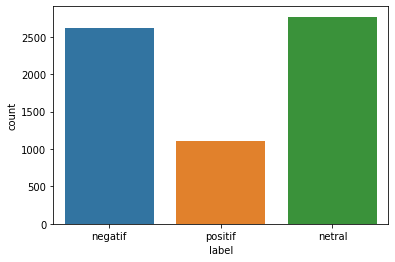

In [ ]:
import seaborn as sns
sns.countplot(x="label", data=dfuji,)

In [ ]:
dfuji.info


<bound method DataFrame.info of                   Date  ...    label
0     10/11/2021 10:23  ...  negatif
1     10/11/2021 10:23  ...  positif
2     10/11/2021 10:22  ...  negatif
3     10/11/2021 10:21  ...  negatif
4     10/11/2021 10:21  ...  negatif
...                ...  ...      ...
6495   10/9/2021 18:59  ...   netral
6496   10/9/2021 18:57  ...  positif
6497   10/9/2021 18:55  ...  negatif
6498   10/9/2021 18:54  ...  negatif
6499   10/9/2021 18:53  ...  negatif

[6500 rows x 4 columns]>

In [ ]:
pip install sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#simpan kata-kata stopword

f = open("stopword_list_tala.txt", "r")
isi = f.read()

tempStoplist = []
for tempstp in isi.split():
  tempStoplist.append(tempstp.lower())

In [ ]:
cleantext = "(@[A-Za-z0-9_-]+)|([^A-Za-z \t\n])|(\w+:\/\/\S+)|(x[A-Za-z0-9]+)|(X[A-Za-z0-9]+)" #regex untuk remove punctuation

def preprocessing(teks):
  teks = teks.rstrip("\n")
  teks = re.sub(r'^https?:\/\/.*[\r\n]*', '', teks, flags=re.MULTILINE)
  teks = re.sub(cleantext,' ',str(teks).lower()).strip() #casefolding dan remove punctuation
 # teks = re.sub(r'[0-9]+', '', teks, flags=re.MULTILINE)
  tokens = []
  for token in teks.split():
    #if token in templist:
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      token = stemmer.stem(token) #lakukan stemming
      if len(token) >= 2:
     #if token != 'b':
       if token != 'rt':
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
dfuji['Teksbersih'] = dfuji.Text.apply(lambda x:preprocessing(x))
dfuji.head()

,Date,Author,Text,label,Teksbersih
0,10/11/2021 10:23,rahmifitria,@VIVAcoid Hah kemaren beri apresiasi ke pinjol...,negatif,hah kemaren apresiasi pinjol bilang gerah muntah
1,10/11/2021 10:23,Klentingkuniing,"Presiden @jokowi ingatkan OJK, banyak pinjol d...",positif,presiden ingat ojk pinjol bunga
2,10/11/2021 10:22,mainterusss,@PartaiSocmed Pinjol illegal ini gampang klo m...,negatif,pinjol illegal gampang klo tekan sebar leluasa...
3,10/11/2021 10:21,Indrijulian_,@susipudjiastuti tau tuh si pinjol membahayaka...,negatif,tau tuh si pinjol bahaya bisa data nik jg bobo...
4,10/11/2021 10:21,MariaTrihartati,"@jokowi Bapak Presiden, pinjol seperti renteni...",negatif,presiden pinjol rentenir diijinkan operasi ten...


In [ ]:
dfuji.head()

,Date,Author,Text,label,Teksbersih
0,10/11/2021 10:23,rahmifitria,@VIVAcoid Hah kemaren beri apresiasi ke pinjol...,negatif,hah kemaren apresiasi pinjol bilang gerah muntah
1,10/11/2021 10:23,Klentingkuniing,"Presiden @jokowi ingatkan OJK, banyak pinjol d...",positif,presiden ingat ojk pinjol bunga
2,10/11/2021 10:22,mainterusss,@PartaiSocmed Pinjol illegal ini gampang klo m...,negatif,pinjol illegal gampang klo tekan sebar leluasa...
3,10/11/2021 10:21,Indrijulian_,@susipudjiastuti tau tuh si pinjol membahayaka...,negatif,tau tuh si pinjol bahaya bisa data nik jg bobo...
4,10/11/2021 10:21,MariaTrihartati,"@jokowi Bapak Presiden, pinjol seperti renteni...",negatif,presiden pinjol rentenir diijinkan operasi ten...


In [ ]:
# dfuji.drop(['Teksbersih'],inplace=True,axis=1)
# dfuji.head()

In [ ]:
dfuji.to_csv('DataPinjolBersih.csv')

In [ ]:
label_train = dfuji['label'].to_numpy()
fitur_train = dfuji[['Author','Teksbersih']]

print(fitur_train)

               Author                                         Teksbersih
0         rahmifitria   hah kemaren apresiasi pinjol bilang gerah muntah
1     Klentingkuniing                    presiden ingat ojk pinjol bunga
2         mainterusss  pinjol illegal gampang klo tekan sebar leluasa...
3        Indrijulian_  tau tuh si pinjol bahaya bisa data nik jg bobo...
4     MariaTrihartati  presiden pinjol rentenir diijinkan operasi ten...
...               ...                                                ...
6495         hrln_512                              mending benjol pinjol
6496            Auzty                   pinjol rem pinjol temen aplikasi
6497         IBChyd98  mending benjol kompres air dingin kempes pinjo...
6498     takutdistalk  beli aja udah pakek pinjol ilegal biar cepet c...
6499     AgumPratama_                          pinjol lintah darat versi

[6500 rows x 2 columns]


In [ ]:
y = dfuji['label']
x = dfuji['Teksbersih']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text  import  CountVectorizer

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(x)


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=2)

In [ ]:
print (y_test)

['positif' 'netral' 'positif' ... 'positif' 'netral' 'negatif']


***SVM***


In [ ]:
from sklearn import svm
from  sklearn.svm  import  SVC
clf_liner = svm.SVC(kernel='linear', C=1.5, random_state=42)
clf_rbf = svm.SVC(kernel='rbf', C=1.5, random_state=42)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1.5, random_state=42)
clf_poly = svm.SVC(kernel='poly', C=1.5, random_state=42)

In [ ]:
clf_liner.fit(x_train,y_train)
clf_rbf.fit(x_train,y_train)
clf_sigmoid.fit(x_train,y_train)
clf_poly.fit(x_train,y_train)

SVC(C=1.5, kernel='poly', random_state=42)

In [ ]:
y_clf_linear = clf_liner.predict(x_test)
y_clf_rbf = clf_rbf.predict(x_test)
y_clf_sigmoid = clf_sigmoid.predict(x_test)
y_clf_poly = clf_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("evaluasi linear ", classification_report(y_test, y_clf_linear),"\n")
print("evaluasi rbf ", classification_report(y_test, y_clf_rbf),"\n")
print("evaluasi sigmoid ", classification_report(y_test, y_clf_sigmoid),"\n")
print("evaluasi poly ", classification_report(y_test, y_clf_poly))

evaluasi linear                precision    recall  f1-score   support

     negatif       0.87      0.78      0.82      1329
      netral       0.72      0.88      0.79      1366
     positif       0.86      0.61      0.71       555

    accuracy                           0.79      3250
   macro avg       0.82      0.76      0.78      3250
weighted avg       0.81      0.79      0.79      3250
 

evaluasi rbf                precision    recall  f1-score   support

     negatif       0.91      0.76      0.83      1329
      netral       0.69      0.93      0.79      1366
     positif       0.96      0.52      0.67       555

    accuracy                           0.79      3250
   macro avg       0.85      0.73      0.76      3250
weighted avg       0.83      0.79      0.79      3250
 

evaluasi sigmoid                precision    recall  f1-score   support

     negatif       0.77      0.76      0.77      1329
      netral       0.69      0.79      0.73      1366
     positif       0.8

In [ ]:
from sklearn.metrics import accuracy_score
x  =  vectorizer.fit_transform(dfuji.Teksbersih.values)
y  =  dfuji.label.values

svc  =  SVC()
clfr  =  svm.SVC(kernel='rbf',  C=1.5 ,random_state=42)

svc.fit(x_train,  y_train)
clfr.fit(x_train,  y_train)

svc_prediction  =  svc.predict(x_test)
clfrpred  =  clfr.predict(x_test)
svc_accuracy  =  accuracy_score(y_test,svc_prediction)
clfrakr  =  accuracy_score(y_test,  clfrpred)
print("Training  accuracy  Score	:  ",clfr.score(x_train,y_train))
print("Vallidation  accuracy  Score	:  ",clfrakr  )
print(classification_report(clfrpred,y_test))

Training  accuracy  Score	:   0.9966153846153846
Vallidation  accuracy  Score	:   0.7895384615384615
              precision    recall  f1-score   support

     negatif       0.76      0.91      0.83      1110
      netral       0.93      0.69      0.79      1842
     positif       0.52      0.96      0.67       298

    accuracy                           0.79      3250
   macro avg       0.73      0.85      0.76      3250
weighted avg       0.83      0.79      0.79      3250



In [ ]:
from sklearn.metrics import confusion_matrix as metrics

In [ ]:
import sklearn.metrics as metrics

In [ ]:
conf = metrics.accuracy_score(y_test, y_test)
conf

1.0

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
conf = confusion_matrix(y_train, y_test)
conf

array([[536, 540, 213],
       [574, 601, 229],
       [219, 225, 113]])

In [ ]:
import matplotlib.pyplot as plt
import itertools

Text(0.5, 15.0, 'Predicted label')

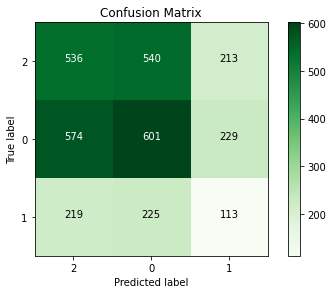

In [ ]:
classes = [2,0,1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

**WordCloud**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
hatred_words = ' '.join(dfuji[dfuji.label == "negatif"].Teksbersih.values)
non_hatred_words = ' '.join(dfuji[dfuji.label == "positif"].Teksbersih.values)
netral = ' '.join(dfuji[dfuji.label == "netral"].Teksbersih.values)

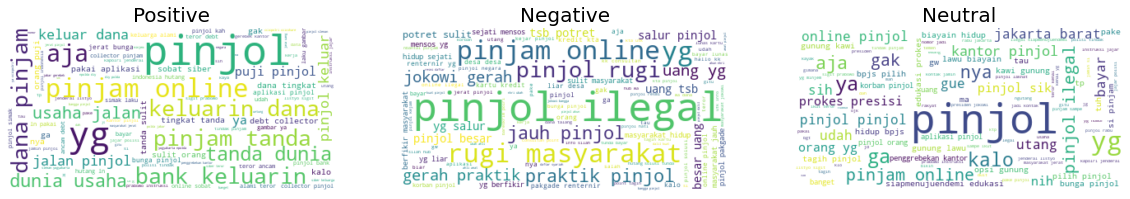

In [ ]:
plt.figure(figsize=(20, 8))

cloud1 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(non_hatred_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Positive', size=20)

cloud2 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(hatred_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Negative', size=20)

cloud3 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(netral)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Neutral', size=20)

plt.show()

***Data pred***

In [ ]:
dfpred =  pd.read_csv("datapred.csv")
dfpred.head()

,Date,Author,Text
0,10/12/2021 3:27,AinTie,b'RT @NadinHang: Keberadaan jasa pinjaman onli...
1,10/12/2021 3:27,FIRASAT🌙,b'RT @pinjollaknat: Akhirnya setelah sekian la...
2,10/12/2021 3:27,MARHAENISME,b'RT @susipudjiastuti: Banyak Masyarakat Terje...
3,10/12/2021 3:26,Kembali berkebun,b'RT @yosnggarang: Rakyat terjerat banyak utan...
4,10/12/2021 3:26,budhiR,b'RT @mojokdotco: Sampai saat ini belum ada so...


In [ ]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6000 non-null   object
 1   Author  6000 non-null   object
 2   Text    6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


In [ ]:
dfpred['teksbersih'] = dfpred.Text.apply(lambda x:preprocessing(x))
dfpred.head()

,Date,Author,Text,teksbersih
0,10/12/2021 3:27,AinTie,b'RT @NadinHang: Keberadaan jasa pinjaman onli...,ada jasa pinjam online pinjol resah presiden j...
1,10/12/2021 3:27,FIRASAT🌙,b'RT @pinjollaknat: Akhirnya setelah sekian la...,sekian pinjol notice presiden
2,10/12/2021 3:27,MARHAENISME,b'RT @susipudjiastuti: Banyak Masyarakat Terje...,masyarakat jerat bunga pinjol perintah jokowi ojk
3,10/12/2021 3:26,Kembali berkebun,b'RT @yosnggarang: Rakyat terjerat banyak utan...,rakyat jerat utang pinjam online dgn bunga nne...
4,10/12/2021 3:26,budhiR,b'RT @mojokdotco: Sampai saat ini belum ada so...,solusi konkret perintah rang pinjol laknat nba...


In [ ]:
xpred = dfpred['teksbersih']
pred = vectorizer.transform(xpred)
dfpred['labelhasil']=clf_liner.predict(pred)

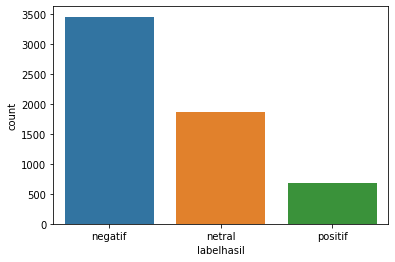

In [ ]:
import seaborn as sns
sns.countplot(x="labelhasil", data=dfpred)

Text(0.5, 1.0, 'TFIDF - SVM')

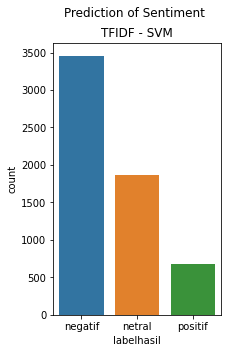

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(3,5), sharey=True)
fig.suptitle('Prediction of Sentiment')
sns.countplot(x="labelhasil", data=dfpred)
axs.set_title("TFIDF - SVM")

In [ ]:
dfpred.to_csv('prediksi.csv',encoding='utf-8')

In [ ]:
dfbaru = pd.read_csv("prediksi.csv",index_col=[0])
dfbaru.head()

,Date,Author,Text,teksbersih,labelhasil
0,10/12/2021 3:27,AinTie,b'RT @NadinHang: Keberadaan jasa pinjaman onli...,ada jasa pinjam online pinjol resah presiden j...,negatif
1,10/12/2021 3:27,FIRASAT🌙,b'RT @pinjollaknat: Akhirnya setelah sekian la...,sekian pinjol notice presiden,netral
2,10/12/2021 3:27,MARHAENISME,b'RT @susipudjiastuti: Banyak Masyarakat Terje...,masyarakat jerat bunga pinjol perintah jokowi ojk,positif
3,10/12/2021 3:26,Kembali berkebun,b'RT @yosnggarang: Rakyat terjerat banyak utan...,rakyat jerat utang pinjam online dgn bunga nne...,positif
4,10/12/2021 3:26,budhiR,b'RT @mojokdotco: Sampai saat ini belum ada so...,solusi konkret perintah rang pinjol laknat nba...,netral


In [ ]:
dfbaru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        6000 non-null   object
 1   Author      6000 non-null   object
 2   Text        6000 non-null   object
 3   teksbersih  5960 non-null   object
 4   labelhasil  6000 non-null   object
dtypes: object(5)
memory usage: 281.2+ KB


In [ ]:
y = dfbaru['labelhasil']
X = dfbaru['teksbersih']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text  import  CountVectorizer

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(xpred)


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn import svm
from  sklearn.svm  import  SVC

clf_liner = svm.SVC(kernel='linear', C=1.5, random_state=42)
clf_rbf = svm.SVC(kernel='rbf', C=1.5, random_state=42)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1.5, random_state=42)
clf_poly = svm.SVC(kernel='poly', C=1.5, random_state=42)

In [ ]:
clf_liner.fit(x_train,y_train)
clf_rbf.fit(x_train,y_train)
clf_sigmoid.fit(x_train,y_train)
clf_poly.fit(x_train,y_train)

SVC(C=1.5, kernel='poly', random_state=42)

In [ ]:
y_clf_linear = clf_liner.predict(x_test)
y_clf_rbf = clf_rbf.predict(x_test)
y_clf_sigmoid = clf_sigmoid.predict(x_test)
y_clf_poly = clf_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("evaluasi linear ", classification_report(y_test, y_clf_linear),"\n")
print("evaluasi rbf ", classification_report(y_test, y_clf_rbf),"\n")
print("evaluasi sigmoid ", classification_report(y_test, y_clf_sigmoid),"\n")
print("evaluasi poly ", classification_report(y_test, y_clf_poly))

evaluasi linear                precision    recall  f1-score   support

     negatif       0.97      0.97      0.97       681
      netral       0.92      0.95      0.93       384
     positif       0.98      0.87      0.92       135

    accuracy                           0.95      1200
   macro avg       0.96      0.93      0.94      1200
weighted avg       0.95      0.95      0.95      1200
 

evaluasi rbf                precision    recall  f1-score   support

     negatif       0.97      0.97      0.97       681
      netral       0.92      0.96      0.94       384
     positif       0.99      0.86      0.92       135

    accuracy                           0.96      1200
   macro avg       0.96      0.93      0.94      1200
weighted avg       0.96      0.96      0.96      1200
 

evaluasi sigmoid                precision    recall  f1-score   support

     negatif       0.96      0.97      0.96       681
      netral       0.91      0.95      0.93       384
     positif       0.9

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
x  =  vectorizer.fit_transform(dfuji.Teksbersih.values)
y  =  dfpred.labelhasil.values

svc  =  SVC()
clfr  =  svm.SVC(kernel='rbf',  C=1.5,  random_state=42)

svc.fit(x_train,  y_train)
clfr.fit(x_train,  y_train)

svc_prediction  =  svc.predict(x_test)
clfrpred  =  clfr.predict(x_test)
svc_accuracy  =  accuracy_score(y_test,svc_prediction)
clfrakr  =  accuracy_score(y_test,  clfrpred)
print("Training  accuracy  Score	:  ",clfr.score(x_train,y_train))
print("Validation  accuracy  Score	:  ",clfrakr  )
print(classification_report(clfrpred,y_test))


Training  accuracy  Score	:   0.9989583333333333
Validation  accuracy  Score	:   0.9558333333333333
              precision    recall  f1-score   support

     negatif       0.97      0.97      0.97       681
      netral       0.96      0.92      0.94       402
     positif       0.86      0.99      0.92       117

    accuracy                           0.96      1200
   macro avg       0.93      0.96      0.94      1200
weighted avg       0.96      0.96      0.96      1200



**Word Cloud**

In [ ]:
hatred_words = ' '.join(dfpred[dfpred.labelhasil == "negatif"].teksbersih.values)
non_hatred_words = ' '.join(dfpred[dfpred.labelhasil == "positif"].teksbersih.values)
netral = ' '.join(dfpred[dfpred.labelhasil == "netral"].teksbersih.values)

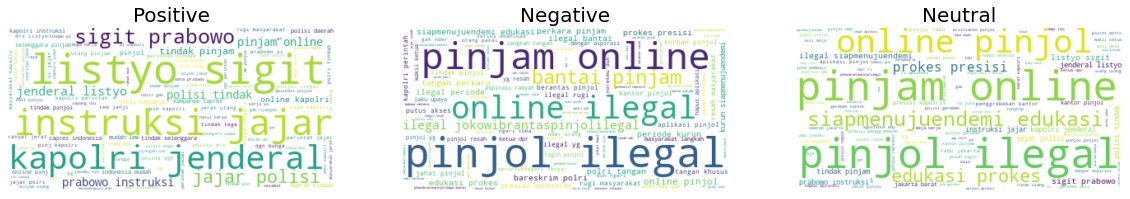

In [ ]:
plt.figure(figsize=(20, 8))

cloud1 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(non_hatred_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Positive', size=20)

cloud2 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(hatred_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Negative', size=20)

cloud3 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(netral)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Neutral', size=20)

plt.show()